## Paris Air BnB Data Analysis for Product Managers

### Load Data and Libraries 

We usually write in the top cell all the packages we want to import for the rest of the notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

don't worry about this

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
paris_df = pd.read_csv("data/noe_airbnb_dataset.csv")
type(paris_df)

pandas.core.frame.DataFrame

### Discover the Data

#### 4 Basic discovering techniques

In [4]:
paris_df.shape

(59070, 27)

In [5]:
paris_df.head()

,Unnamed: 0,Unnamed: 0.1,listing_url,name,summary,space,description,experiences_offered,host_id,host_since,...,longitude,property_type,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month
0,0,0,https://www.airbnb.com/rooms/2577,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,2827,2008-09-09,...,2.362511,Loft,Entire home/apt,2.0,2.0,$125.00,$40.00,3,NaN,NaN
1,1,1,https://www.airbnb.com/rooms/3109,zen and calm,Appartement très calme de 50M2 Belle lumière D...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14,none,3631,2008-10-14,...,2.318518,Apartment,Entire home/apt,1.0,1.0,$75.00,$50.00,3,100.0,0.29
2,2,2,https://www.airbnb.com/rooms/5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,7903,2009-02-14,...,2.358690,Apartment,Entire home/apt,1.0,0.0,$115.00,$36.00,2,94.0,1.29
3,3,3,https://www.airbnb.com/rooms/7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,2626,2008-08-30,...,2.352751,Apartment,Entire home/apt,1.0,2.0,$115.00,$50.00,10,94.0,2.47
4,4,4,https://www.airbnb.com/rooms/7964,Large & sunny flat with balcony !,Very large & nice apartment all for you! - Su...,hello ! We have a great 75 square meter apartm...,Very large & nice apartment all for you! - Su...,none,22155,2009-06-18,...,2.343411,Apartment,Entire home/apt,1.0,2.0,$99.00,$60.00,3,96.0,0.06


In [6]:
paris_df.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
listing_url                      0
name                            74
summary                       2328
space                        19028
description                    487
experiences_offered              0
host_id                          0
host_since                       8
host_response_rate           28463
host_neighbourhood            7930
host_total_listings_count        8
host_identity_verified           8
neighbourhood_cleansed           0
zipcode                          0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
bathrooms                       76
bedrooms                        66
price                            0
cleaning_fee                 16522
minimum_nights                   0
review_scores_rating         13359
reviews_per_month            12271
dtype: int64

In [7]:
paris_df.dtypes

Unnamed: 0                     int64
Unnamed: 0.1                   int64
listing_url                   object
name                          object
summary                       object
space                         object
description                   object
experiences_offered           object
host_id                        int64
host_since                    object
host_response_rate            object
host_neighbourhood            object
host_total_listings_count    float64
host_identity_verified        object
neighbourhood_cleansed        object
zipcode                        int64
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
bathrooms                    float64
bedrooms                     float64
price                         object
cleaning_fee                  object
minimum_nights                 int64
review_scores_rating         float64
reviews_per_month            float64
d

In [8]:
paris_df.neighbourhood_cleansed.unique()

array(['Entrepôt', 'Observatoire', 'Hôtel-de-Ville', 'Opéra',
       'Ménilmontant', 'Louvre', 'Popincourt', 'Buttes-Montmartre',
       'Élysée', 'Panthéon', 'Gobelins', 'Luxembourg', 'Buttes-Chaumont',
       'Reuilly', 'Bourse', 'Vaugirard', 'Batignolles-Monceau',
       'Palais-Bourbon', 'Temple', 'Passy'], dtype=object)

### Clean the Data

##### Drop/Fill the empty values

In [9]:
paris_df["cleaning_fee"].fillna("0.0$",inplace=True)

In [10]:
paris_df.dropna(subset = ["description"], inplace=True)

In [11]:
paris_df.shape

(58583, 27)

##### Keep only relevant columns

In [12]:
paris_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'listing_url', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'host_id', 'host_since',
       'host_response_rate', 'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'zipcode',
       'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms',
       'bedrooms', 'price', 'cleaning_fee', 'minimum_nights',
       'review_scores_rating', 'reviews_per_month'],
      dtype='object')

In [13]:
columns_to_drop = ["summary","description","listing_url"]
paris_df.drop(columns_to_drop,axis="columns", inplace=True)
paris_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'space', 'experiences_offered',
       'host_id', 'host_since', 'host_response_rate', 'host_neighbourhood',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price',
       'cleaning_fee', 'minimum_nights', 'review_scores_rating',
       'reviews_per_month'],
      dtype='object')

##### Change value types 

In [14]:
paris_df['price'] = paris_df.price.str.replace('[\$\,]|\.\d*', '').astype(int)
paris_df['cleaning_fee'] = paris_df.cleaning_fee.str.replace('[\$\,]|\.\d*', '').astype(int)
paris_df.head()

,Unnamed: 0,Unnamed: 0.1,name,space,experiences_offered,host_id,host_since,host_response_rate,host_neighbourhood,host_total_listings_count,...,longitude,property_type,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month
0,0,0,Loft for 4 by Canal Saint Martin,The district has any service or shop you may d...,none,2827,2008-09-09,75%,République,2.0,...,2.362511,Loft,Entire home/apt,2.0,2.0,125,40,3,NaN,NaN
1,1,1,zen and calm,I bedroom appartment in Paris 14,none,3631,2008-10-14,100%,Alésia,1.0,...,2.318518,Apartment,Entire home/apt,1.0,1.0,75,50,3,100.0,0.29
2,2,2,Explore the heart of old Paris,"Small, well appointed studio apartment at the ...",none,7903,2009-02-14,100%,Saint-Paul - Ile Saint-Louis,1.0,...,2.358690,Apartment,Entire home/apt,1.0,0.0,115,36,2,94.0,1.29
3,3,3,MARAIS - 2ROOMS APT - 2/4 PEOPLE,PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,none,2626,2008-08-30,100%,Le Marais,2.0,...,2.352751,Apartment,Entire home/apt,1.0,2.0,115,50,10,94.0,2.47
4,4,4,Large & sunny flat with balcony !,hello ! We have a great 75 square meter apartm...,none,22155,2009-06-18,75%,Gare du Nord - Gare de I'Est,1.0,...,2.343411,Apartment,Entire home/apt,1.0,2.0,99,60,3,96.0,0.06


In [15]:
paris_df.cleaning_fee.head(30)

0      40
1      50
2      36
3      50
4      60
5       0
6     200
7      20
8      50
9      35
10     36
11      0
12     70
13      0
14      0
15     70
16     60
17     20
18     25
19     20
20      0
21     42
22     30
23     20
24     50
25     20
26     10
27     75
28     30
29    150
Name: cleaning_fee, dtype: int64

### Manipulate the Data

### Select rows and columns : Create Sub Dataset

##### Select Rows

In [16]:
# 1 row 
paris_df[1:2]

,Unnamed: 0,Unnamed: 0.1,name,space,experiences_offered,host_id,host_since,host_response_rate,host_neighbourhood,host_total_listings_count,...,longitude,property_type,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month
1,1,1,zen and calm,I bedroom appartment in Paris 14,none,3631,2008-10-14,100%,Alésia,1.0,...,2.318518,Apartment,Entire home/apt,1.0,1.0,75,50,3,100.0,0.29


In [17]:
paris_df[:2]

,Unnamed: 0,Unnamed: 0.1,name,space,experiences_offered,host_id,host_since,host_response_rate,host_neighbourhood,host_total_listings_count,...,longitude,property_type,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month
0,0,0,Loft for 4 by Canal Saint Martin,The district has any service or shop you may d...,none,2827,2008-09-09,75%,République,2.0,...,2.362511,Loft,Entire home/apt,2.0,2.0,125,40,3,NaN,NaN
1,1,1,zen and calm,I bedroom appartment in Paris 14,none,3631,2008-10-14,100%,Alésia,1.0,...,2.318518,Apartment,Entire home/apt,1.0,1.0,75,50,3,100.0,0.29


##### Select Columns

In [18]:
paris_df['price']
# OR 
paris_df.price

0        125
1         75
2        115
3        115
4         99
        ... 
59065     45
59066     40
59067     58
59068     81
59069     99
Name: price, Length: 58583, dtype: int64

In [19]:
paris_df[["name","price"]]

,name,price
0,Loft for 4 by Canal Saint Martin,125
1,zen and calm,75
2,Explore the heart of old Paris,115
3,MARAIS - 2ROOMS APT - 2/4 PEOPLE,115
4,Large & sunny flat with balcony !,99
...,...,...
59065,Charming and Calme Studio for two Persons,45
59066,Studio récent 28m2 au bord de Paris,40
59067,"Studio charme, Canal St Martin",58
59068,LUXURY APARTMENT - Etoile / Arc de Triomphe,81


##### Select Lines and Columns

In [20]:
paris_df[:2][['space','price']]

,space,price
0,The district has any service or shop you may d...,125
1,I bedroom appartment in Paris 14,75


##### Boolean Indexing : Select with a condition

In [21]:
paris_df['price'] < 100
paris_df[paris_df['price'] < 100]

,Unnamed: 0,Unnamed: 0.1,name,space,experiences_offered,host_id,host_since,host_response_rate,host_neighbourhood,host_total_listings_count,...,longitude,property_type,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month
1,1,1,zen and calm,I bedroom appartment in Paris 14,none,3631,2008-10-14,100%,Alésia,1.0,...,2.318518,Apartment,Entire home/apt,1.0,1.0,75,50,3,100.0,0.29
4,4,4,Large & sunny flat with balcony !,hello ! We have a great 75 square meter apartm...,none,22155,2009-06-18,75%,Gare du Nord - Gare de I'Est,1.0,...,2.343411,Apartment,Entire home/apt,1.0,2.0,99,60,3,96.0,0.06
5,5,5,GREAT FLAT w/ CITY VIEW,Really nice flat located in the 20th district ...,none,25435,2009-07-13,NaN,Père Lachaise - Ménilmontant,1.0,...,2.393263,Apartment,Entire home/apt,1.0,1.0,90,0,3,100.0,0.01
6,6,6,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !","Since I live in the USA, it is difficult to ma...",none,28422,2009-07-29,86%,Châtelet - Les Halles - Beaubourg,3.0,...,2.347347,Apartment,Entire home/apt,1.0,1.0,75,200,180,NaN,NaN
7,7,7,Paris petit coin douillet,Make your stay in Paris a perfect experience. ...,none,33534,2009-08-24,80%,République,1.0,...,2.371341,Apartment,Entire home/apt,1.0,1.0,70,20,5,99.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59065,59876,59876,Charming and Calme Studio for two Persons,Studio de 20m2 à proximité de l'avenue Foch da...,none,44511985,2015-09-18,100%,Châtelet - Les Halles - Beaubourg,2.0,...,2.281544,Serviced apartment,Entire home/apt,1.0,0.0,45,50,30,NaN,NaN
59066,59877,59877,Studio récent 28m2 au bord de Paris,NaN,none,153886633,2017-10-09,NaN,NaN,1.0,...,2.330878,Apartment,Entire home/apt,1.0,0.0,40,0,1,NaN,1.00
59067,59878,59878,"Studio charme, Canal St Martin",NaN,none,25351458,2014-12-29,NaN,Canal Saint-Martin,1.0,...,2.366238,Apartment,Entire home/apt,1.0,0.0,58,0,2,NaN,NaN
59068,59879,59879,LUXURY APARTMENT - Etoile / Arc de Triomphe,At home in Paris... An incredible hideaway if ...,none,229551435,2018-12-07,NaN,Champs-Elysées,1.0,...,2.289126,Apartment,Entire home/apt,1.0,1.0,81,60,2,NaN,NaN


In [22]:
paris_df.host_response_rate = paris_df.host_response_rate.str.replace('%', '').astype(float)
paris_df['host_response_rate'] > 75
paris_df[paris_df['host_response_rate'] > 75]

,Unnamed: 0,Unnamed: 0.1,name,space,experiences_offered,host_id,host_since,host_response_rate,host_neighbourhood,host_total_listings_count,...,longitude,property_type,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month
1,1,1,zen and calm,I bedroom appartment in Paris 14,none,3631,2008-10-14,100.0,Alésia,1.0,...,2.318518,Apartment,Entire home/apt,1.0,1.0,75,50,3,100.0,0.29
2,2,2,Explore the heart of old Paris,"Small, well appointed studio apartment at the ...",none,7903,2009-02-14,100.0,Saint-Paul - Ile Saint-Louis,1.0,...,2.358690,Apartment,Entire home/apt,1.0,0.0,115,36,2,94.0,1.29
3,3,3,MARAIS - 2ROOMS APT - 2/4 PEOPLE,PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,none,2626,2008-08-30,100.0,Le Marais,2.0,...,2.352751,Apartment,Entire home/apt,1.0,2.0,115,50,10,94.0,2.47
6,6,6,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !","Since I live in the USA, it is difficult to ma...",none,28422,2009-07-29,86.0,Châtelet - Les Halles - Beaubourg,3.0,...,2.347347,Apartment,Entire home/apt,1.0,1.0,75,200,180,NaN,NaN
7,7,7,Paris petit coin douillet,Make your stay in Paris a perfect experience. ...,none,33534,2009-08-24,80.0,République,1.0,...,2.371341,Apartment,Entire home/apt,1.0,1.0,70,20,5,99.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59043,59854,59854,paris la place de clichy,NaN,none,220595237,2018-10-14,90.0,Saint-Lazare,2.0,...,2.326580,Apartment,Entire home/apt,0.5,0.0,34,10,4,NaN,NaN
59055,59866,59866,studio aux batignolles,NaN,none,141819329,2017-07-22,100.0,Batignolles,2.0,...,2.323067,Apartment,Entire home/apt,1.0,1.0,110,0,2,NaN,NaN
59063,59874,59874,Functionnal & Cosy Flat In Northern Paris For 4,1) What is so cool about the flat: - very wel...,none,34684410,2015-05-31,100.0,Passy,33.0,...,2.360979,Apartment,Entire home/apt,1.0,1.0,111,39,1,NaN,NaN
59064,59875,59875,Beautiful Top floor studio/Sacre Coeur view,"Welcome to my flat in the eart of Montmartre, ...",none,5316302,2013-03-04,100.0,Montmartre,2.0,...,2.346018,Loft,Entire home/apt,1.0,1.0,100,30,2,NaN,NaN


#### Create a new column

 Let's say as a PM you are interested in having a closer look to luxury listings. A better way to display apartment price is just to list an apartment as : Affordable Or Expensive. So let's create a column called : price_category

In [23]:
paris_df.loc[paris_df["price"] > 300, "price_category"] = 'Expensive'
paris_df.loc[paris_df["price"] <= 300, "price_category"] = 'Affordable'
paris_df.loc[paris_df["cleaning_fee"] > 0, "has_cleaning_fee"] = "yes"
paris_df.loc[paris_df["cleaning_fee"] == 0, "has_cleaning_fee"] = "no"

In [24]:
paris_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'space', 'experiences_offered',
       'host_id', 'host_since', 'host_response_rate', 'host_neighbourhood',
       'host_total_listings_count', 'host_identity_verified',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price',
       'cleaning_fee', 'minimum_nights', 'review_scores_rating',
       'reviews_per_month', 'price_category', 'has_cleaning_fee'],
      dtype='object')

There is an other obvious column that we should have created. Can you see it ? 

### Business Questions 

#### What is the mean and median price of a listing in Paris  ❓

In [25]:
paris_df['price'].median()

80.0

In [26]:
paris_df['price'].mean()

110.86477305703019

#### How many listings have a cleaning fee ❓

In [27]:
paris_df['has_cleaning_fee'].value_counts()

yes    39269
no     19314
Name: has_cleaning_fee, dtype: int64

#### What is the average rating for expensive and affordable listings   ❓

In [28]:
expensive_listings = paris_df[paris_df['price_category'] == "Expensive"]
affordable_listings = paris_df[paris_df['price_category'] == "Affordable"]

In [29]:
expensive_listings.review_scores_rating.mean()

94.20449077786688

In [30]:
affordable_listings.review_scores_rating.mean()

92.79593267882188

#### What are the best reviewed listings  (with minimum 3 reviews per months) ❓

In [31]:
reviewed_listings = paris_df[paris_df['reviews_per_month'] > 3]
reviewed_listings.nlargest(10,'review_scores_rating')

,Unnamed: 0,Unnamed: 0.1,name,space,experiences_offered,host_id,host_since,host_response_rate,host_neighbourhood,host_total_listings_count,...,room_type,bathrooms,bedrooms,price,cleaning_fee,minimum_nights,review_scores_rating,reviews_per_month,price_category,has_cleaning_fee
2802,2811,2811,Paris Tour Eiffel 15e Appartement 2 pièces 50m2,Appartement 2 pièces de 50m² avec une petite t...,none,6667881,2013-05-31,NaN,Tour Eiffel - Champ de Mars,1.0,...,Entire home/apt,1.0,1.0,90,0,2,100.0,3.13,Affordable,no
4964,5001,5001,2Pièces Duplex 54m2 +Terrasse 20m2,Appartement type loft disposant de 2 pièces en...,none,12421039,2014-02-20,100.0,Buttes-Chaumont - Belleville,1.0,...,Entire home/apt,1.0,1.0,95,0,2,100.0,4.03,Affordable,no
5228,5270,5270,Paris Montmartre : Jolie chambre sur cour fleurie,NaN,none,13430813,2014-03-23,80.0,Montmartre,1.0,...,Private room,1.0,1.0,60,5,1,100.0,3.70,Affordable,yes
5535,5587,5587,"NOTRE DAME:bright, elegant apt 2 BR",The space: This apartment is designed to comfo...,none,1801963,2012-02-24,100.0,Notre Dame - Ile de La Cité,1.0,...,Entire home/apt,1.0,2.0,300,110,5,100.0,3.16,Affordable,yes
5764,5818,5818,Quiet / Bright apt btwn Buttes Chaumont & Jour...,"This flat for 3 people, is located in 19th dis...",none,15087229,2014-05-04,NaN,Buttes-Chaumont - Belleville,1.0,...,Entire home/apt,1.0,1.0,80,60,2,100.0,3.59,Affordable,yes
10895,10993,10993,"Studio lumineux et calme, Paris Belleville","Ce studio est pratique, spacieux et calme. Il ...",none,29382043,2015-03-15,80.0,République,1.0,...,Entire home/apt,1.0,0.0,60,20,3,100.0,3.05,Affordable,yes
11487,11591,11591,cosy room,NaN,none,31590660,2015-04-20,100.0,Père Lachaise - Ménilmontant,3.0,...,Private room,1.5,1.0,40,15,1,100.0,3.56,Affordable,yes
11885,11991,11991,Appartement cosy au coeur de Paris.,"Appartement deux pièces chambre et salon, avec...",none,15301422,2014-05-09,100.0,Buttes-Chaumont - Belleville,1.0,...,Entire home/apt,1.0,1.0,80,0,2,100.0,6.00,Affordable,no
14122,14244,14244,THE BEST DEAL IN THE MARAIS,If you want to get the local feeling of living...,none,5815201,2013-04-07,100.0,III Arrondissement,1.0,...,Entire home/apt,1.0,1.0,90,40,1,100.0,3.43,Affordable,yes
16386,16525,16525,Appartement 55 m2 en plein coeur Paris !,Logement spacieux avec balcon dans bel immeubl...,none,7852785,2013-07-31,100.0,X Arrondissement,1.0,...,Entire home/apt,1.0,1.0,95,0,3,100.0,3.33,Affordable,no


### Visualize Data

#### What are arrondissement with most listings ❓

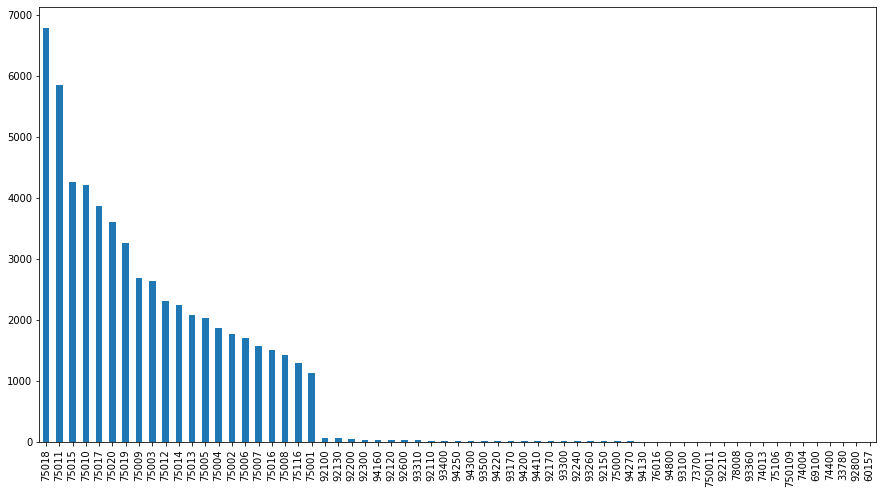

In [32]:
plt.figure(figsize=(15, 8))
paris_df.zipcode.value_counts().plot(kind='bar')

That's not very nice...

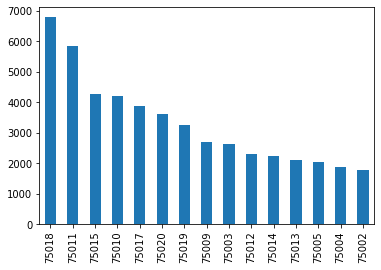

In [33]:
paris_df.zipcode.value_counts().head(15).plot(kind='bar')

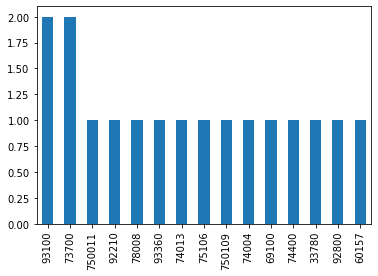

In [34]:
paris_df.zipcode.value_counts().tail(15).plot(kind='bar')

##### It's always better to give a name to a graph and explain what X and Y are !

#### What is the share of expensive listings for arr. with most listings ❓

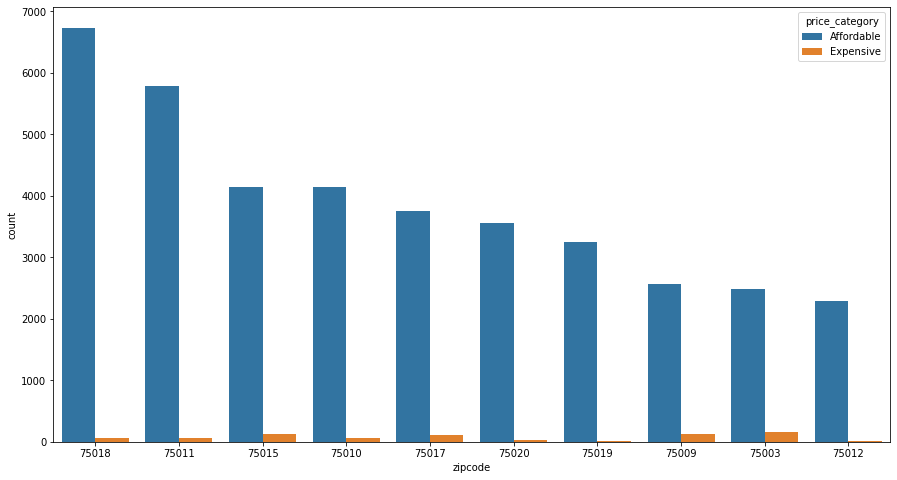

In [35]:
plt.figure(figsize=(15, 8))
order = paris_df.zipcode.value_counts().head(10).index
sns.countplot(data=paris_df,x="zipcode",hue="price_category", order=order)

#### [Distribution] What is the distribution of listings' price  ❓

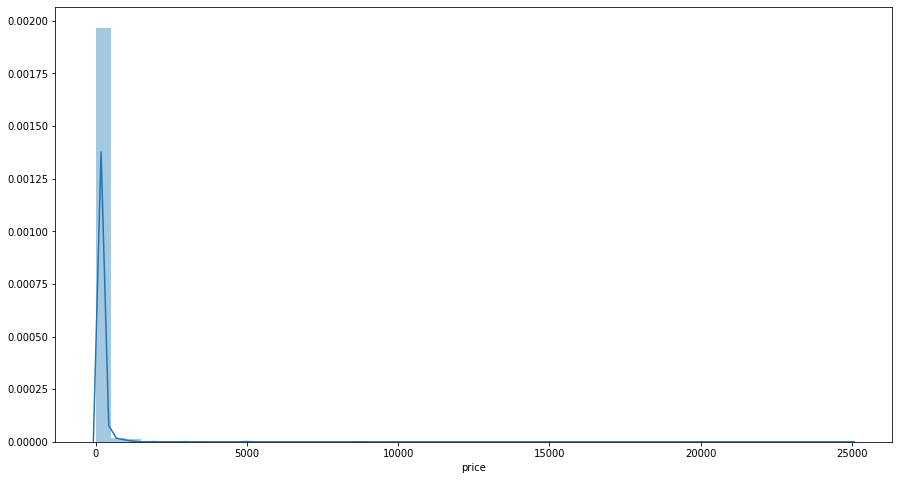

In [36]:
plt.figure(figsize=(15, 8))
sns.distplot(paris_df['price'])

Text(0, 0.5, '%')

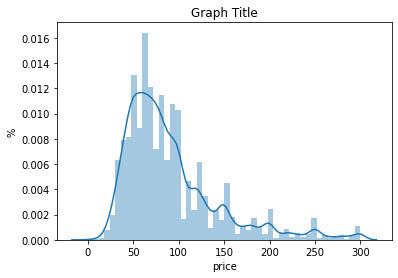

In [37]:
affordable_listings_df = paris_df[paris_df['price'] <= 300]
sns.distplot(affordable_listings_df['price'])
plt.title('Graph Title')
plt.ylabel('%')

#### Violin Plot

#### What is the price distribution for each arrondissement ❓

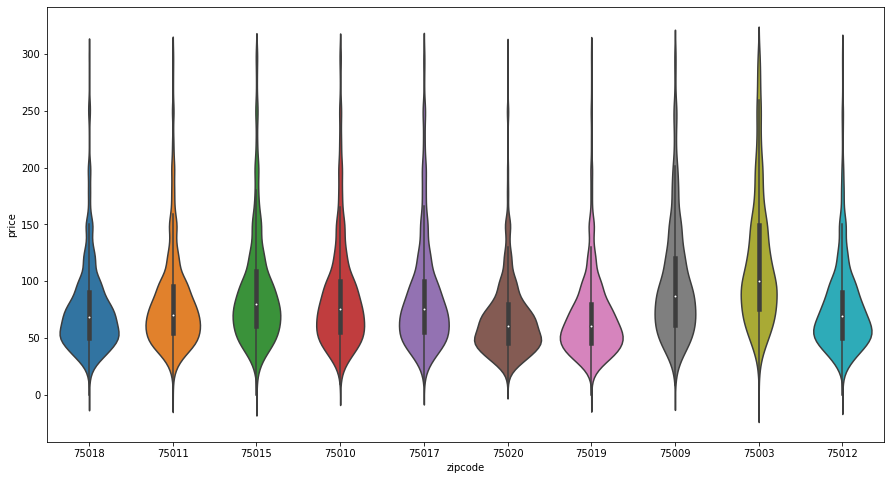

In [38]:
plt.figure(figsize=(15, 8))
order = paris_df.zipcode.value_counts().head(10).index
sns.violinplot(data=affordable_listings_df, x="zipcode", y="price", order=order)

##### Let's see the geography of listings

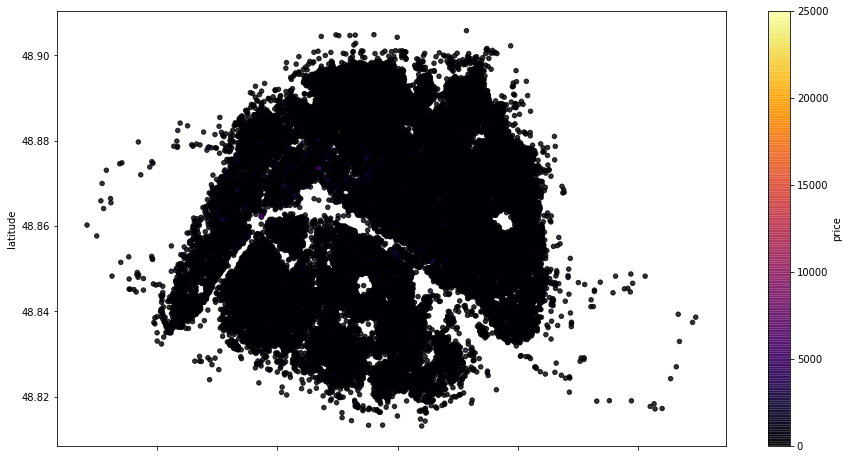

In [39]:
paris_df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(15,8))

Why is everything Black ? 

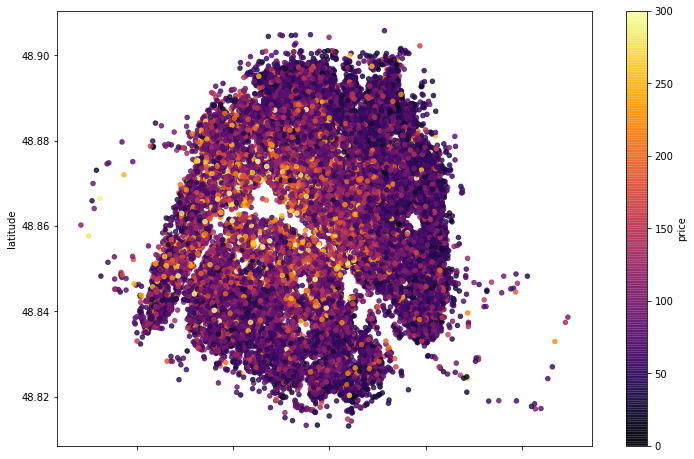

In [40]:
affordable_listings_df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))